    waterfront renovated  view  condition  grade  bedrooms  bathrooms  \
0            0         0     0          4      3         3       0.75   
1            0         0     0          3      3         2       1.00   
2            0       yes     0          3      2         2       1.00   
3            0         0     0          4      2         2       1.00   
4            0         0     0          4      2         3       1.00   
..         ...       ...   ...        ...    ...       ...        ...   
356          0         0     4          3      4         5       3.00   
357          0         0     0          3      4         4       3.50   
358          0         0     0          3      4         4       3.50   
359          0         0     2          3      4         4       3.50   
360        yes         0     0          3      4         4       3.50   

     sqft_living  sqft_lot  floors  sqft_above  sqft_basement  age  \
0           2510     20000     2.0        2510       

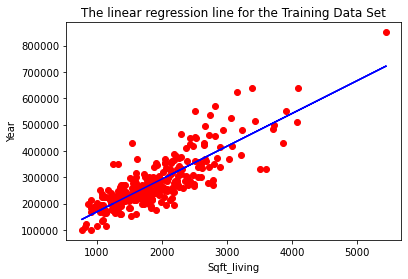

Plot the linear regression line for the Test Data Set


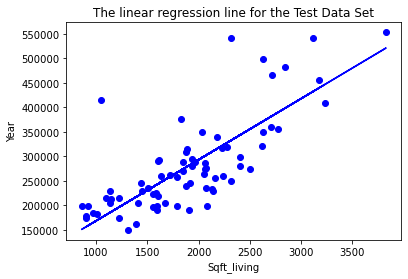

Predict the house prices for the test data set given above.

Score =  0.5748464550259902
Sample  1 : [[356786.4785045]]
Sample  2 : [[230942.83624628]]
Sample  3 : [[401641.6381213]]
Sample  4 : [[552778.60649677]]
Sample  5 : [[604735.83305289]]
Sample  6 : [[401641.6381213]]
Sample  7 : [[137494.58704462]]
Part (C):  Use Multiple Linear Regression using all variables to predict the house price
Rsquare =  0.7358874912286645
Predict the house prices for the test data set given above.

Sample  1 : [[351776.90850072]]
Sample  2 : [[232511.52761215]]
Sample  3 : [[354803.95527506]]
Sample  4 : [[623561.34780135]]
Sample  5 : [[660784.66337466]]
Sample  6 : [[515283.45381951]]
Sample  7 : [[326042.61685208]]
Use Decision Tree Regression model to predict the house price
Rsquare =  0.5347858498116531
Predict the house prices for the test data set given above.

Sample  1 : [363000.]
Sample  2 : [215000.]
Sample  3 : [271500.]
Sample  4 : [637000.]
Sample  5 : [637000.]
Sample  6 : [524225.]
S

In [9]:
# Name: Giang Duong
# CS 156 SPRING 2021
# Professor Sanjoy Paul
# Homework 2
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

### PART A: DATA IMPORT AND DATA PROCESSING
import pandas as pd

# read file form csv
filecsv = pd.read_csv('Housing-Data-one-zip-4.csv')
print(filecsv)
frame = pd.DataFrame(filecsv)
print("Table value: \n", frame)
# all rows except the last row
X = frame.iloc[:, :-2].values
# the last row of dataframe
Y = frame.iloc[:, -2].values
Y = Y.reshape(-1, 1)

# transform data.
year_2020 = frame.iloc[:,-1].values
year_2020 = year_2020.reshape(-1,1)
year_2020 = [2020 - x for x in year_2020]
print("Convert to year 2020:\n", year_2020)

i  =np.array([3, 0.75, 2510, 20000, 2.0, 2510, 0, 59, 2130, 20000]).reshape(-1,1)
ii =np.array([4, 2.25, 1500,  5393, 2.0, 1500, 0, 21, 1500,  5952]).reshape(-1,1)
iii=np.array([4, 2.25, 2870,  5393, 2.0, 2870, 0, 21, 1500,  5952]).reshape(-1,1)
iv =np.array([4, 3.50, 4083, 68377, 2.0, 4083, 0, 15, 2430, 41382]).reshape(-1,1)
v  =np.array([4, 3.50, 4500, 68377, 2.0, 4500, 0, 15, 2430, 41382]).reshape(-1,1)
vi =np.array([4, 3.50, 2870, 68377, 2.0, 2870, 0, 15, 2430, 41382]).reshape(-1,1)
vii=np.array([4, 3.50,  750, 68377, 2.0,  750, 0, 15, 2430, 41382]).reshape(-1,1)
from sklearn.metrics import r2_score
array_linear = [i[2], ii[2], iii[2], iv[2], v[2], vi[2], vii[2]]
array = np.array([i, ii, iii, iv, v, vi, vii])
print("7 data sets:", array)

# convert categorical data: Waterfront, Renovated, Condition, Grade
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0, 1, 2, 3, 4])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
# print(X)

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X = imputer.fit_transform(X)
X = imputer.transform(X)
X = X[:,15:]
print("After transform X= \n",X)

imputer2 = SimpleImputer(missing_values=np.nan, strategy='mean')
Y = imputer2.fit_transform(Y)
Y = imputer2.transform(Y)
print("House price values= \n",Y)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# devide the data set into training set and test set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
print("X_test\n", x_test)
print("X_train\n", x_train)
print("y_test\n", y_test)
print("y_train\n", y_train)
sc = StandardScaler()

print("PART B: Use Simple Linear Regression to predict the house price using Sqft_living as the independent variable")
from sklearn.linear_model import LinearRegression
import warnings

sqrt_living = X[:, 2].reshape(-1, 1)
print("sqrt_living\n",sqrt_living)
x1_train, x1_test, y1_train, y1_test = train_test_split(sqrt_living, Y, test_size=0.2, random_state=1)
print("X_test sqrt_living \n", x_test)
print("X_train sqrt_living\n", x_train)
print("y_test sqrt_living\n", y_test)
print("y_train sqrt_living\n", y_train)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
linear_reg = LinearRegression()
linear_reg.fit(x1_train, y1_train)

print("Plot the linear regression line for the Training Data Set")
linear_train = plt
linear_train.scatter(x1_train, y1_train, color='red')
linear_train.plot(x1_train, linear_reg.predict(x1_train), color='blue')
linear_train.title('The linear regression line for the Training Data Set')
linear_train.xlabel('Sqft_living')
linear_train.ylabel('Year')
linear_train.show()

print("Plot the linear regression line for the Test Data Set")
linear_test = plt
linear_test.scatter(x1_test, y1_test, color='blue')
linear_test.plot(x1_test, linear_reg.predict(x1_test), color='blue')
linear_test.title('The linear regression line for the Test Data Set')
linear_test.xlabel('Sqft_living')
linear_test.ylabel('Year')
linear_test.show()

print("Predict the house prices for the test data set given above.\n")
score = linear_reg.score(x1_test, y1_test)
print("Score = ", score)

i = 1
for k in array_linear:
    s = linear_reg.predict([k])
    print("Sample ",i,":",s)
    i += 1


print("Part (C):  Use Multiple Linear Regression using all variables to predict the house price")
multi_reg = LinearRegression()
# exact all feature except 5 dummies variables
multi_reg.fit(x_train, y_train)
r2 = multi_reg.score(x_test, y_test)
print("Rsquare = ", r2)

predit_multi_linear = multi_reg.predict(x_test)
print("Predict the house prices for the test data set given above.\n")
i = 1
for k in array:
    k = k.reshape(1,-1)
    s = multi_reg.predict(k)
    print("Sample ",i,":",s)
    i += 1

print("Use Decision Tree Regression model to predict the house price")
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(random_state=0)
tree.fit(x_train, y_train)

r2 = tree.score(x_test, y_test)
print("Rsquare = ", r2)
tree_predict = tree.predict(x_test)
print("Predict the house prices for the test data set given above.\n")

i = 1
for k in array:
    k = k.reshape(1,-1)
    s = tree.predict(k)
    print("Sample ",i,":",s)
    i += 1

print("Use Random Forest Regression model (use 10 Random Trees) to predict house price")
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=10, random_state=0)
forest.fit(x_train,y_train.ravel())
r2 = tree.score(x_test, y_test)
print("Rsquare = ", r2)
forest_predict = forest.predict(x_test)
print("Predict the house prices for the test data set given above.\n")
i = 1
for k in array:
    k = k.reshape(1,-1)
    s = forest.predict(k)
    print("Sample ",i,":",s)
    i += 1


print("Random forest predictive model is the best because they have the highest r2_score, which mean they give the better prediction.\n")
print("Use Multiple Linear Regression Model to find the most important variables: \n")
best_feature = np.array(multi_reg.coef_)
print(best_feature.reshape(-1, 1))
print("Sort the coef_ list: \n ")
x = best_feature.argsort()
print(x)
print("We can see bedroom, floors are the most important variables since they are the most negative and positive coef_ .\n")

